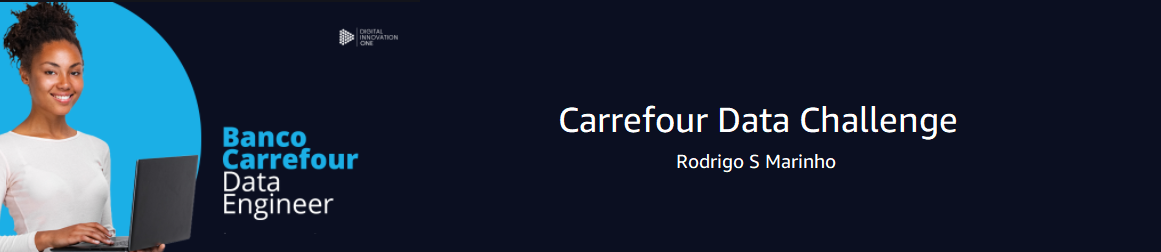

<h3>Bibliotecas</h3>

Caso seja necessário, instale as bibliotecas através do comando: pip install "nome da biblioteca"

In [1]:
from datetime import date
import json

#gráficas
from wordcloud import *
import matplotlib.pyplot as plt
from PIL import Image

#Análise de sentimento
import tweepy
from textblob import TextBlob
from textblob import Blobber
from textblob.sentiments import NaiveBayesAnalyzer

import pandas as pd
import numpy as np

#Natural Language Toolkit
import nltk
#nltk.download()

import re

#import CountVectorizer para contar o número de vezes que uma palavra ocorre
from sklearn.feature_extraction.text import CountVectorizer



<h3>Chaves do twitter</h3>

Chaves obtidas através da plataforma de desenvolvedor, e requisitadas apenas para o desafio através de uma nova conta no twitter
    

In [3]:
consumer_key = "tpQq57y00qOjmEiiFY4Bl2UtP"
consumer_secret = "tEDNqoHOH4bdDS5zfN14rgJdxkx2YpXMSzd3EqOQiEu6FDGpyg"
access_token = "1378444156520038402-AZaUTs53DLeoQlay4U6AHHWeX6FEkt"
access_token_secret = "lM4SDXffkJTuhaH7rH13iu9beNHxToGWFasH56POpUBd5"

<h3>Utilizando o TwitterSearch e TwitterSearchOrder para a extração dos tweets:</h3>

Documentação:https://twittersearch.readthedocs.io/en/v0.78.2/TwitterSearchOrder.html https://twittersearch.readthedocs.io/en/v0.78.2/index.html#twittersearch

<h4>Extraindo os dados de busca através do TwitterSearch e armazenando em um JSON</h4>

No campo "tso.set_keywords" deve-se inserir a busca desejada.

Ex:"tso.set_keywords(['Exemplo'],or_operator = True)"

In [3]:
from TwitterSearch import *

try:
    ts = TwitterSearch(  #Objeto twittersearch
        consumer_key = consumer_key,
        consumer_secret = consumer_secret,
        access_token = access_token,
        access_token_secret = access_token_secret
    )
    
    #Padrões que queremos pesquisar
    tso = TwitterSearchOrder() 
    tso.set_keywords(['Teen Wolf'], or_operator = True) #operador or para a pesquisa
    tso.set_language('pt')
    #tso.set_until(datetime.date(2021, 9, 23))


    
    for tweet in ts.search_tweets_iterable(tso):
        
        print('created_at: ',tweet['created_at'], 'User_id: ',tweet['id_str'], 'Tweet: ',tweet['text'])
        
        created_at = tweet['created_at']
        user_id = tweet['id_str']
        texto = tweet['text']
        
        with open('tweet_teenwolf.json', 'a+') as output:
            
            data = { 'created_at': created_at,
                     'User_id': user_id,
                     'tweet': texto}
            #print(data)
            output.write('{}\n'.format(json.dumps(data)))

except TwitterSearchException as e:
    print(e)



created_at:  Sat Sep 25 15:51:00 +0000 2021 User_id:  1441792358325051392 Tweet:  RT @stilinskygf: eu: quero morrer 
teen wolf voltando: quer nada 
eu: quero nada, eu hein
created_at:  Sat Sep 25 15:50:57 +0000 2021 User_id:  1441792346815934467 Tweet:  RT @srxvision: ⚠️ QUERO SEGUIR MAIS FÃS DE TEEN WOLF ⚠️

deem rt aqui por favor
created_at:  Sat Sep 25 15:50:55 +0000 2021 User_id:  1441792340306403336 Tweet:  RT @SeriesTWBZ: Um filme de Teen Wolf é confirmado para 2022 na Paramount+. https://t.co/8VjdEoUyae
created_at:  Sat Sep 25 15:50:55 +0000 2021 User_id:  1441792338083434500 Tweet:  RT @hbitualz: época boa era quando pretty little liars teen wolf e the vampire diaries eram as maiores séries teens do momento
created_at:  Sat Sep 25 15:50:54 +0000 2021 User_id:  1441792335507955724 Tweet:  RT @goticslahey: cenas de teen wolf que dá para você ouvir https://t.co/cwDAT2VlRd
created_at:  Sat Sep 25 15:50:54 +0000 2021 User_id:  1441792333171892225 Tweet:  RT @bissexualuke: vendo a sé

<h5>Importando nosso dataset e criando o dataframe através do JSON

In [2]:
df = pd.read_json('tweet_teenwolf.json', lines = True)
df.head(10)

created_at              User_id  \
0 2021-09-25 15:51:00+00:00  1441792358325051392   
1 2021-09-25 15:50:57+00:00  1441792346815934464   
2 2021-09-25 15:50:55+00:00  1441792340306403328   
3 2021-09-25 15:50:55+00:00  1441792338083434496   
4 2021-09-25 15:50:54+00:00  1441792335507955712   
5 2021-09-25 15:50:54+00:00  1441792333171892224   
6 2021-09-25 15:50:53+00:00  1441792331292680192   
7 2021-09-25 15:50:52+00:00  1441792325336780800   
8 2021-09-25 15:50:52+00:00  1441792324778921984   
9 2021-09-25 15:50:51+00:00  1441792321692086272   

                                               tweet  
0  RT @stilinskygf: eu: quero morrer \nteen wolf ...  
1  RT @srxvision: ⚠️ QUERO SEGUIR MAIS FÃS DE TEE...  
2  RT @SeriesTWBZ: Um filme de Teen Wolf é confir...  
3  RT @hbitualz: época boa era quando pretty litt...  
4  RT @goticslahey: cenas de teen wolf que dá par...  
5  RT @bissexualuke: vendo a série          vendo...  
6  RT @ilyella4: STANS DE TEEN WOLF ME SIGAM EU J...  
7  RT @fallingbstars: os fãs de teen wolf agr htt...  
8  RT @fallingbstars: os fãs de teen wolf agr htt...  
9         O filme de Teen Wolf é um surto mto grande

<h5>Quantidade de linhas e colunas.

In [3]:
df.shape

(18000, 3)

<h5>Valores duplicados podem ser eliminados, mas quando falamos de twitter a ação RT pode passar a informação de que o usuário que duplicou o tweet também pensa o mesmo que o autor do tweet.

In [4]:
# Removendo os valores duplicados:

#df.drop_duplicates(['tweet'], inplace = True)

In [25]:
#df.shape

<h3>Utilização das bibliotecas de linguagem natural:</h3>

Documentação:https://www.nltk.org

Um conjunto de bibliotecas para processamento simbólico e estatístico da linguagem natural foi utilizado. Realizou-se um processo de dividir uma string ou textos em uma lista de tokens, tal processo é conhecido como Tokenize. Para o twitter, o padrão utilizado foi diferente, pois a análise dos emojis também será efetuada. 

Visando uma busca mais eficiente, a eliminação de Stopwords, que são termos frequentes em um idioma, porém que não possuem relevância nas pesquisas, foi realizada. Tais termos como preposições, artigos, conjunções e outros. 
Ao término do processo uma coluna contendo os tweets “limpos” foi criada no dataframe para armazená-los (“preprocessed”).


<h4>Funções para o processo de Tokenize

In [5]:
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()

tweets_tokenized = [tweet_tokenizer.tokenize(tweet)for tweet in df.tweet]

<h4>função para remoção das stopwords

In [6]:
def Preprocessing(instancia):
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','').replace('rt','')
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))
    

In [7]:
#aplica a função em todos os dados:
tweets = [Preprocessing(i) for i in df.tweet]
df['preprocessed'] = tweets
df.head()

created_at              User_id  \
0 2021-09-25 15:51:00+00:00  1441792358325051392   
1 2021-09-25 15:50:57+00:00  1441792346815934464   
2 2021-09-25 15:50:55+00:00  1441792340306403328   
3 2021-09-25 15:50:55+00:00  1441792338083434496   
4 2021-09-25 15:50:54+00:00  1441792335507955712   

                                               tweet  \
0  RT @stilinskygf: eu: quero morrer \nteen wolf ...   
1  RT @srxvision: ⚠️ QUERO SEGUIR MAIS FÃS DE TEE...   
2  RT @SeriesTWBZ: Um filme de Teen Wolf é confir...   
3  RT @hbitualz: época boa era quando pretty litt...   
4  RT @goticslahey: cenas de teen wolf que dá par...   

                                        preprocessed  
0  @stilinskygf quero morrer teen wolf voltando q...  
1  @srxvision ⚠️ quero seguir fãs teen wolf ⚠️ de...  
2  @seriestwbz filme teen wolf confirmado 2022 pa...  
3  @hbitualz época boa pretty little liars teen w...  
4              @goticslahey cenas teen wolf dá ouvir

<h3>Contando as palavras mais citadas nos tweets e plotando um gráfico de barras

In [8]:
#Cria uma matriz que mostra o número de vezes que palavras específicas aparecem no texto da coluna 

cv = CountVectorizer()
count_matrix = cv.fit_transform(df.preprocessed)

#cria dataframe
word_count = pd.DataFrame(cv.get_feature_names(), columns = ['word'])

#soma as palavras e converte em uma lista
word_count['count'] = count_matrix.sum(axis=0).tolist()[0]
word_count = word_count.sort_values('count', ascending = False).reset_index(drop=True)

#50 palavras mais usadas
word_count[:50]

word  count
0            wolf  18713
1            teen  18520
2           filme   7178
3             fãs   2212
4           volta   1881
5             vai   1838
6           quero   1772
7             agr   1747
8   fallingbstars   1724
9             ter   1548
10         stiles   1481
11           2022   1447
12          vendo   1258
13           nada   1247
14        momento   1234
15          dylan   1191
16       voltando   1190
17            pra   1144
18         fandom   1124
19          agora   1101
20        maiores   1079
21    goticslahey   1074
22          nunca   1044
23             dá   1037
24            faz   1029
25          cenas   1015
26          época   1009
27          ouvir   1007
28       alcatéia    994
29            the    954
30         séries    941
31          liars    931
32        diaries    931
33         pretty    931
34         little    931
35            boa    931
36        vampire    930
37       hbitualz    923
38          teens    922
39          série    896
40        allison    861
41          brien    838
42       witchdob    713
43      paramount    710
44          nesse    673
45          tyler    651
46             né    651
47      stilinski    639
48  ressuscitaram    629
49          falta    623

<Figure size 2880x2880 with 0 Axes>

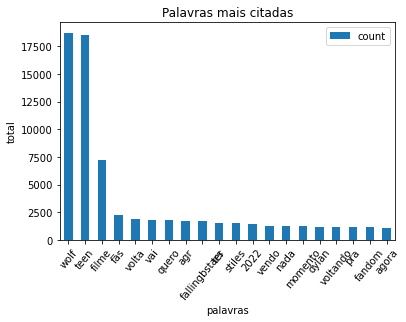

In [9]:
df2 = word_count[:20]
plt.figure(figsize=(40,40))
df2.plot.bar(x='word', y='count', style='o',title="Palavras mais citadas")
plt.xticks(rotation=50)
plt.xlabel("palavras")
plt.ylabel("total")
plt.show();

In [31]:
#convertendo em str a coluna de tweets limpa para a criação de uma word cloud
text = str(df['preprocessed'])

#text

<h3>Nuvem de palavras utilizando a biblioteca wordcloud:</h3>

Documentação:https://amueller.github.io/word_cloud/index.html

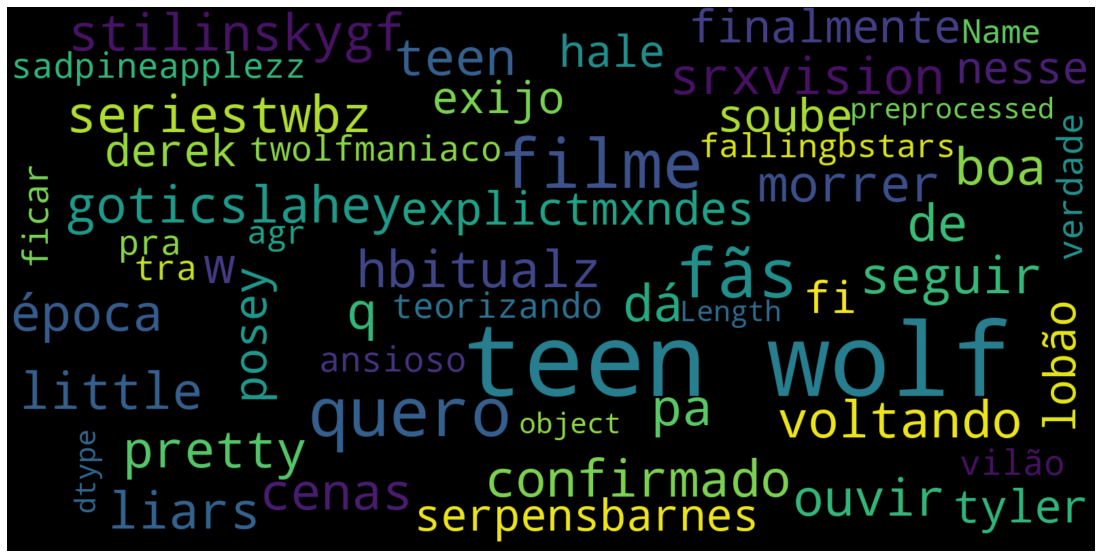

In [32]:
wordcloud = WordCloud(max_font_size=150, max_words=400, background_color="black",width=1600, height=800).generate(text)
plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<h3>Análise de sentimentos dos tweets 'preprocessed' utilizando a biblioteca textblob:</h3>

Documentação: https://textblob.readthedocs.io/en/dev/

In [33]:
tb = Blobber(analyzer=NaiveBayesAnalyzer())
for tweet in df['preprocessed']:
    print(tweet,tb(tweet).sentiment)
    


@stilinskygf quero morrer teen wolf voltando quer nada quero nada, hein Sentiment(classification='neg', p_pos=0.2991412213740452, p_neg=0.7008587786259555)
@srxvision ⚠️ quero seguir fãs teen wolf ⚠️ deem aqui favor Sentiment(classification='pos', p_pos=0.7249911902035067, p_neg=0.27500880979649434)
@seriestwbz filme teen wolf confirmado 2022 paramount+ Sentiment(classification='pos', p_pos=0.6340201653086353, p_neg=0.36597983469136575)
@hbitualz época boa pretty little liars teen wolf the vampire diaries maiores séries teens momento Sentiment(classification='neg', p_pos=0.06203196521945324, p_neg=0.9379680347805484)
@goticslahey cenas teen wolf dá ouvir Sentiment(classification='pos', p_pos=0.561492537313433, p_neg=0.43850746268656726)
@bissexualuke vendo série vendo filme teen wolf teen wolf Sentiment(classification='pos', p_pos=0.561492537313433, p_neg=0.43850746268656726)
@ilyella4 stans teen wolf sigam juro q soi legal Sentiment(classification='pos', p_pos=0.8194888178913746, p_ne

<h3>Para uma melhor visualização dos sentimentos, novas colunas foram adicionadas no dataframe (classification,	p_pos,	p_neg):</h3>

As colunas "p_pos" e "p_neg" mostram as probabilidades de sentimento para cada tweet. Já a "classification", após a análise das probabilidades nos diz o sentimento do tweet

In [34]:
from textblob import Blobber
from textblob.sentiments import NaiveBayesAnalyzer
tb = Blobber(analyzer=NaiveBayesAnalyzer())
for index, row in df.iterrows():
    sent = tb(row['preprocessed']).sentiment
    df.loc[index, 'classification'] = sent[0]
    df.loc[index, 'p_pos'] = sent[1]
    df.loc[index, 'p_neg'] = sent[2]

In [35]:
df

created_at              User_id  \
0     2021-09-25 15:51:00+00:00  1441792358325051392   
1     2021-09-25 15:50:57+00:00  1441792346815934464   
2     2021-09-25 15:50:55+00:00  1441792340306403328   
3     2021-09-25 15:50:55+00:00  1441792338083434496   
4     2021-09-25 15:50:54+00:00  1441792335507955712   
...                         ...                  ...   
17995 2021-09-25 11:27:21+00:00  1441726012249739264   
17996 2021-09-25 11:27:21+00:00  1441726009259147264   
17997 2021-09-25 11:27:20+00:00  1441726007782879232   
17998 2021-09-25 11:27:19+00:00  1441726002862772224   
17999 2021-09-25 11:27:19+00:00  1441726000266629120   

                                                   tweet  \
0      RT @stilinskygf: eu: quero morrer \nteen wolf ...   
1      RT @srxvision: ⚠️ QUERO SEGUIR MAIS FÃS DE TEE...   
2      RT @SeriesTWBZ: Um filme de Teen Wolf é confir...   
3      RT @hbitualz: época boa era quando pretty litt...   
4      RT @goticslahey: cenas de teen wolf que dá par...   
...                                                  ...   
17995  RT @explictmxndes: o tyler posey quando soube ...   
17996  RT @serpensbarnes: exijo o meu lobão derek hal...   
17997  RT @sadpineapplezz: e se o vilão do filme de t...   
17998  RT @Twolfmaniaco: ansioso pra ficar teorizando...   
17999  RT @fallingbstars: os fãs de teen wolf agr htt...   

                                            preprocessed classification  \
0      @stilinskygf quero morrer teen wolf voltando q...            neg   
1      @srxvision ⚠️ quero seguir fãs teen wolf ⚠️ de...            pos   
2      @seriestwbz filme teen wolf confirmado 2022 pa...            pos   
3      @hbitualz época boa pretty little liars teen w...            neg   
4                  @goticslahey cenas teen wolf dá ouvir            pos   
...                                                  ...            ...   
17995  @explictmxndes tyler posey soube finalmente at...            pos   
17996  @serpensbarnes exijo lobão derek hale nesse fi...            pos   
17997  @sadpineapplezz vilão filme teen wolf verdade ...            pos   
17998  @twolfmaniaco ansioso pra ficar teorizando tra...            neg   
17999                   @fallingbstars fãs teen wolf agr            pos   

          p_pos     p_neg  
0      0.299141  0.700859  
1      0.724991  0.275009  
2      0.634020  0.365980  
3      0.062032  0.937968  
4      0.561493  0.438507  
...         ...       ...  
17995  0.536718  0.463282  
17996  0.744255  0.255745  
17997  0.649068  0.350932  
17998  0.423051  0.576949  
17999  0.561493  0.438507  

[18000 rows x 7 columns]

<h3>Gráfrico de barras da análise de sentimentos

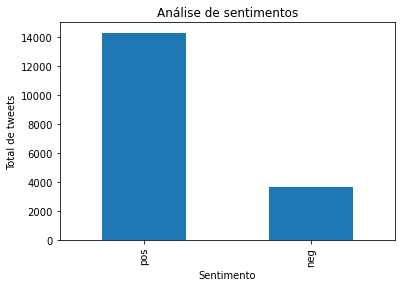

In [82]:
df["classification"].value_counts().plot.bar(title="Análise de sentimentos")
plt.ylabel("Total de tweets")
plt.xlabel('Sentimento');

<h3>Porcentagem de tweets positivos e negativos

In [70]:
df['classification'].value_counts('pos')

pos    0.795389
neg    0.204611
Name: classification, dtype: float64

<h3>Exportando nosso data frame em um arquivo csv

In [20]:
df.to_csv('twitterdataset', encoding='utf-8', index=False)